<a href="https://colab.research.google.com/github/stxupengyu/Milti-Label-Classification-Data-Preprocessing/blob/master/Eurlex_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#挂载云盘 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#进入项目目录
print('original document')
!ls
import os
os.chdir('/content/drive/My Drive/colab/XML')
print('current document')
!ls

original document
eurlex			    rcv1.topics.hier.orig.txt
eurlex_data_analysis.ipynb  rcv_embedding_mean.npz
EURLex.py		    rcv_embedding.npz
glove			    XML-Glove-Embedding.ipynb
current document
eurlex			    rcv1.topics.hier.orig.txt
eurlex_data_analysis.ipynb  rcv_embedding_mean.npz
EURLex.py		    rcv_embedding.npz
glove			    XML-Glove-Embedding.ipynb


In [ ]:
import numpy as np
def load_data():
  #读取训练集标签数据
  file_name='eurlex/3714/eurlex_data_3714.npz'
  data=np.load(file_name,allow_pickle=True)
  y_train=data['y_train']
  print('读取数据集的shape：',y_train.shape)
  return y_train
def one_hot2value(y_train):
  #将训练集标签数据从one-hot转为value
  y_yrain_value=[]
  for line in y_train:
    indices=line.argsort()[-int(sum(line)):] 
    y_yrain_value.append(indices)
    #record_real=[word_to_id_reverse[i+1] for i in real_indices]
  return y_yrain_value
def combination_2(label_list):
  #输入一个列表，输出所有的二元组
    record=[]
    for index in range(len(label_list)):
        for index2 in range(len(label_list)):
            if index2>index:
                record.append([label_list[index],label_list[index2]])
    return record
    
y_train=load_data()
#同时构建两个字典，二元组id和实际单词id的字典，二元组id和其频次的字典,时间略长大概10分钟
label_values_list=one_hot2value(y_train)
label_cooccurrence_dict={}#构建共现序号-二元组的字典
label_cooccurrence_feq_dict={}#构建共现序号-频次的字典
count=0
for label_values in label_values_list:
  for label_value in combination_2(label_values):
    if label_value not in label_cooccurrence_dict.values():
      label_cooccurrence_dict[count]=label_value
      label_cooccurrence_feq_dict[count]=1
      count+=1
    if label_value in label_cooccurrence_dict.values():
      for key in label_cooccurrence_dict.keys():
        if label_cooccurrence_dict[key]==label_value:
          label_cooccurrence_feq_dict[key]=label_cooccurrence_feq_dict[key]+1
print('二元共现组合数量为：%d'%len(label_cooccurrence_dict))

(13905, 3714)

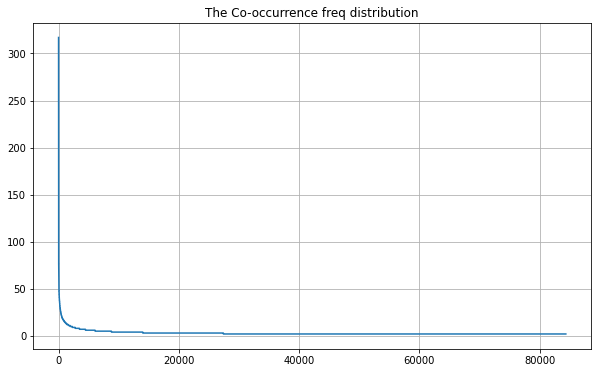

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
def feq_sort(label_cooccurrence_feq_dict):
  #输入序号-频次字典，输出频次由高到低的序号
  label_cooccurrence_feq_list=[]
  for key in label_cooccurrence_feq_dict.keys():
    label_cooccurrence_feq_list.append(-label_cooccurrence_feq_dict[key])
  feq_index=np.array(label_cooccurrence_feq_list).argsort()
  return feq_index
def feq_show(feq_index):
  #展示共现次数的分布 顺便返回一个频次数据
  feq_plot=[]
  for i in feq_index:
    feq_plot.append(label_cooccurrence_feq_dict[i])
  plt.figure(figsize=(10,6))
  plt.plot(feq_plot)
  plt.title('The Co-occurrence freq distribution')
  plt.grid()
  plt.show()
  return feq_plot
def index2value(feq_index):
  #输入二元组序号的频次排序，输出二元组value（按频次排序）
  value_feq_record=[]
  for index in feq_index:
    value_feq_record.append(label_cooccurrence_dict[index])
  return value_feq_record
def label_dict_fun():
  label_dict={}
  count=0
  data_path='eurlex/3714/label_vocab.txt'
  iFile = open(data_path, "r")
  for line in iFile.readlines():
    lineVec = line.strip().split("\t")#根据\t将一行分割
    label_i=lineVec[-1]
    label_dict[count]=label_i
    count+=1
  return label_dict
def value2words(value_feq_record):
  #将二元组value形式转化为二元组word形式---相当于可以看到单词
  word_feq_record=[]
  for value in value_feq_record:
    inst_record=[]
    for inst in value:
      inst_record.append(label_dict[inst])
    word_feq_record.append(inst_record)
  return word_feq_record
feq_index=feq_sort(label_cooccurrence_feq_dict)
feq_record=feq_show(feq_index)
value_feq_record=index2value(feq_index)
label_dict=label_dict_fun()
word_feq_record=value2words(value_feq_record)

In [ ]:
import pandas as pd
def list2df():
  #将刚刚得到的共现二元组的文本和频次汇总，输出为df文件
  word_feq_record_array=np.array(word_feq_record)
  feq_record_array=np.array(feq_record)
  print('二元组的shape和频次的shape：',word_feq_record_array.shape,feq_record_array.shape)
  word_feq_record_pd=pd.DataFrame(word_feq_record_array)
  word_feq_record_pd['freq']=feq_record_array
  return word_feq_record_pd
def df2csv():
  #进一步将df文件保存为csv
  word_feq_record_pd=list2df()
  save_file='label_coocurrence_freq.csv'
  word_feq_record_pd.to_csv(save_file)
  print('已经成功保存%s文件'%save_file)
df2csv()

二元组的shape和频次的shape： (84380, 2) (84380,)
已经成功保存label_coocurrence_freq.csv文件
